In [1]:
p

/home/wally/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def distance(s, t):
    return (s - t)**2

In [3]:
def DTWDistance2(s, t, w):
    DTW = {}
    w = max(w, abs(len(s) - len(t)))
    for i in range(-1, len(s)):
        for j in range(-1, len(t)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
    for i in range(len(s)):
        for j in range(max(0, i - w), min (len(t), i + w)):
            dist = distance(s[i], t[j])
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)], DTW[(i - 1, j - 1)])
    return math.sqrt(DTW[len(s) - 1, len(t) - 1])

In [4]:
def DTWDistance(s, t):
    DTW = {}
    for i in range(len(s)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(t)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0
    for i in range(len(s)):
        for j in range(len(t)):
            dist = distance(s[i], t[j])
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)], DTW[(i - 1, j - 1)])
    return math.sqrt(DTW[len(s) - 1, len(t) - 1])

In [5]:
def LBKeogh(s, t, r):
    LBSum = 0
    for ind, i in enumerate(s):
        lowerBound = min((t))
        upperBound = max((t))
        if i > upperBound:
            LBSum = LBSum + (i - upperBound)**2
        elif i < lowerBound:
            LBSum = LBSum + (i - lowerBound)**2
    return math.sqrt(LBSum)

In [7]:
def knn(train, test, w):
    preds = []
    for ind, i in enumerate(test):
        minDist = float('inf')
        closestSeq = []
        for j in train:
            if LBKeogh(i[:-1], j[:-1], 5) < minDist:
                dist = DTWDistance2(i[:-1], j[:-1], w)
                if dist < minDist:
                    minDist = dist
                    closestSeq = j;
        preds.append(closestSeq[-1])
    return classification_report(test[:, -1], preds)

In [8]:
def Kmeans(data, centroids, clusters, iteractions, w = 5):
    counter = 0
    for n in range(iteractions):
        counter += 1
        print(counter)
        assignments = {}
        for ind, i in enumerate(data):
            minDist = float('inf')
            closestClust = None
            for key in centroids:
                if LBKeogh(i, centroids[key], 5) < minDist:
                    curDist = DTWDistance2(i, centroids[key], w)
                    if curDist < minDist:
                        minDist = curDist
                        closestClust = key
            if closestClust in assignments:
                assignments[closestClust].append(ind)
            else:
                assignments[closestClust] = []        
    return assignments

In [9]:
biggerLinks = {}
smallestLinks = {}
sz = -1
with open("/home/wally/eclipse-workspace/pkmeansimulator/output/sequences/10-biggerSequences-with-link-interval-2020-06-04T11:59:59.507123.csv","r") as f:
    for i in f.readlines():
        l = list(map(str, i.split(';')))
        biggerLinks[l[0]] = int(l[1])
        if (sz < int(l[1])):
            sz = int(l[1])
with open("/home/wally/eclipse-workspace/pkmeansimulator/output/sequences/10-smallestSequences-with-link-interval-2020-06-04T11:59:59.507123.csv","r") as f:
    for i in f.readlines():
        l = list(map(str, i.split(';')))
        smallestLinks[l[0]] = int(l[1])
print(biggerLinks)
print(smallestLinks)
print(sz)

{'298786464-79200-82800': 501, '327005892-79200-82800': 503, '221553428-79200-82800': 521, '298786469-79200-82800': 523, '688769623-0-3600': 529, '298786465-79200-82800': 557, '298786467-79200-82800': 560, '298786468-79200-82800': 561, '298786466-79200-82800': 566, '152980843-0-3600': 743}
{'152746500-82800-86400': 2, '420135389-82800-86400': 2, '301677886-82800-86400': 2, '547531535-82800-86400': 2, '547531525-82800-86400': 2, '103934334-82800-86400': 2, '301677885-82800-86400': 2, '634307497-82800-86400': 2, '157490277-82800-86400': 2, '8838069-82800-86400': 2}
743


In [10]:
links = {}
type(links)

dict

In [11]:
def chartFirst(links,file, size, df):
    name = file.split("-")
    print(name[0]+"-"+name[1])
    l = df['link'].value_counts().head(size).index.tolist()
    print(df['link'].value_counts().head(size))
    links[name[0]+"-"+name[1]] = l
    print(l)

In [12]:
def chartLast(size, df):
    df = df['link'].value_counts()
    df.tail(size).plot(kind = 'bar')
    plt.show()

In [13]:
def chartFirst(size, df):
    df = df['link'].value_counts()
    df.head(size).plot(kind = 'bar')
    plt.show()

In [26]:
bigger_accessed_sequence = {}
smallest_accessed_sequence = {}
links_id = list()
links_interval = list()
for link_id in biggerLinks:
    links_id.append(link_id.split('-')[0])
    links_interval.append(link_id.split('-')[1]+'-'+link_id.split('-')[2])

for link_id in smallestLinks:
    links_id.append(link_id.split('-')[0])
    links_interval.append(link_id.split('-')[1]+'-'+link_id.split('-')[2])
   
print(links_id)
print(links_interval)

['298786464', '327005892', '221553428', '298786469', '688769623', '298786465', '298786467', '298786468', '298786466', '152980843', '152746500', '420135389', '301677886', '547531535', '547531525', '103934334', '301677885', '634307497', '157490277', '8838069']
['79200-82800', '79200-82800', '79200-82800', '79200-82800', '0-3600', '79200-82800', '79200-82800', '79200-82800', '79200-82800', '0-3600', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400']


In [27]:
data = []
most_accessed_sequence = {}
with open("/home/wally/eclipse-workspace/pkmeansimulator/output/sequences/with-link-interval-2020-06-04T12:11:35.643643.csv","r") as f:
    for i in f.readlines():
        l = list(map(int, i.split(';')))
        if str(l[0]) in links_id and str(l[1])+'-'+str(l[2]) in links_interval:
            most_accessed_sequence[str(l[0])+'-'+str(l[1])+'-'+str(l[2])] = l[3:]
        else:
            data.append(l)
print(len(most_accessed_sequence))
print(len(data))

20
5454


In [16]:
def chartLinks(sz, link, data, link_interval):
    for xx in data:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(link.ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Link %s' % link_interval,
             transform=plt.gca().transAxes)
    plt.title(link_interval)
    plt.tight_layout()
    plt.show()

In [17]:
def chartLink(link, link_interval):
    plt.plot(link.ravel(), "r-")
    plt.xlim(0, len(link))
    plt.ylim(link[0], link[len(link)-1])
    plt.text(0.55, 0.85,'Link %s' % link_interval,
             transform=plt.gca().transAxes)
    plt.title(link_interval)
    plt.tight_layout()
    plt.show()

152746500-82800-86400


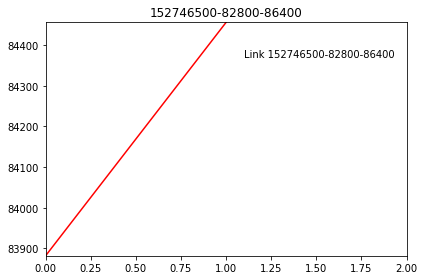

[[83882.]
 [84456.]]


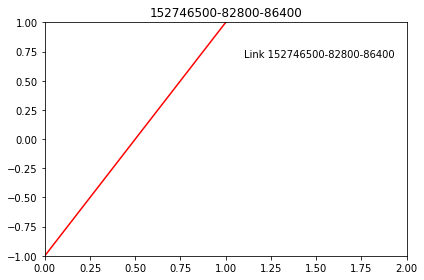

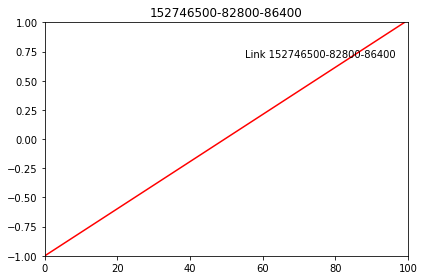

420135389-82800-86400


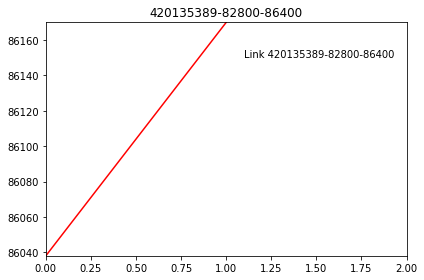

[[86038.]
 [86170.]]


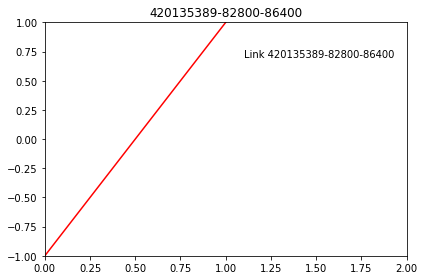

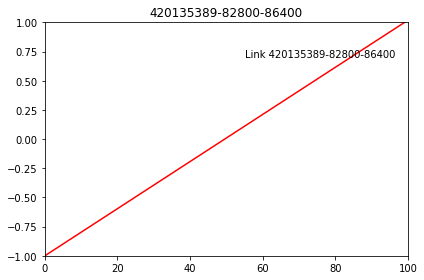

301677886-82800-86400


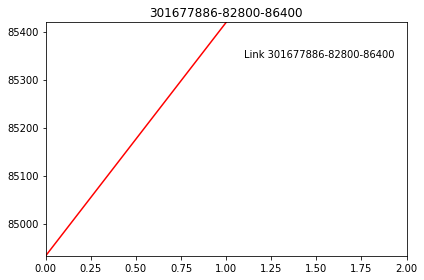

[[84933.]
 [85419.]]


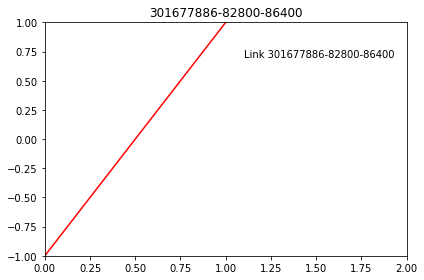

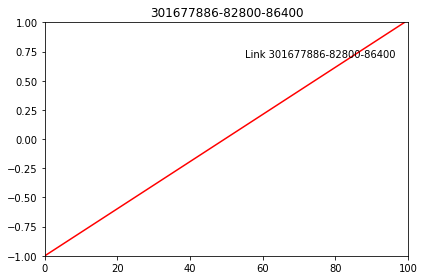

547531535-82800-86400


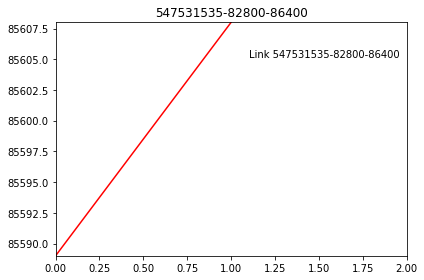

[[85589.]
 [85608.]]


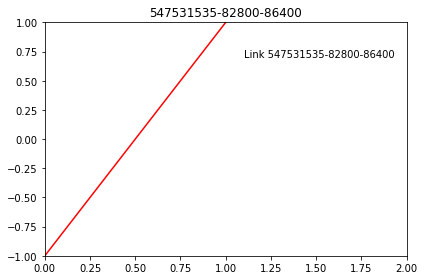

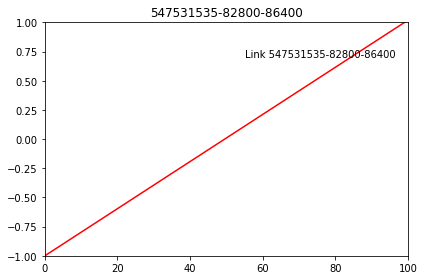

547531525-82800-86400


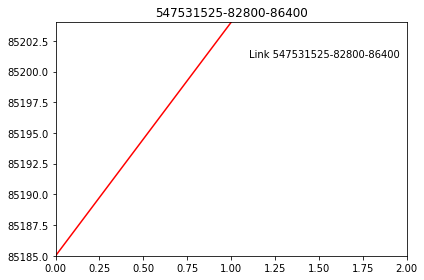

[[85185.]
 [85204.]]


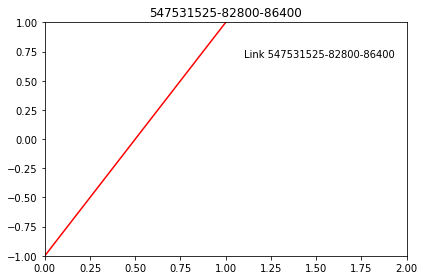

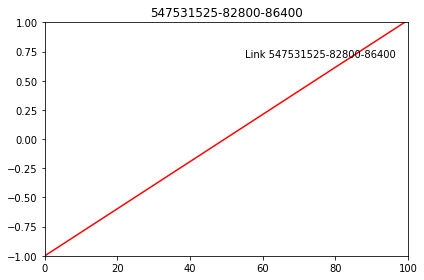

103934334-82800-86400


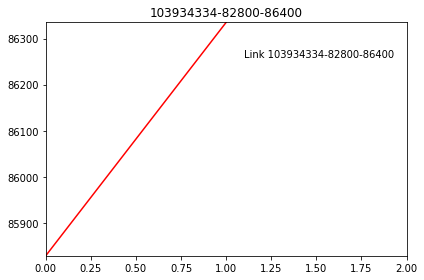

[[85829.]
 [86335.]]


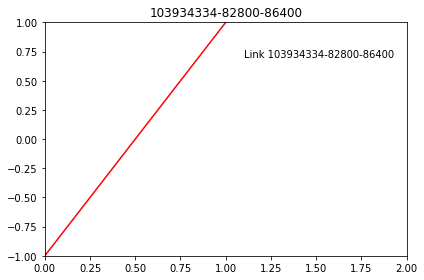

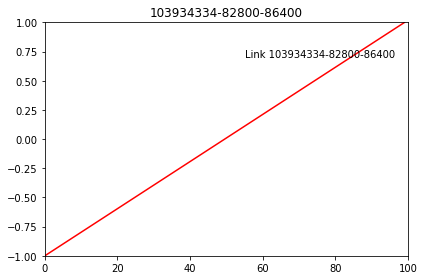

301677885-82800-86400


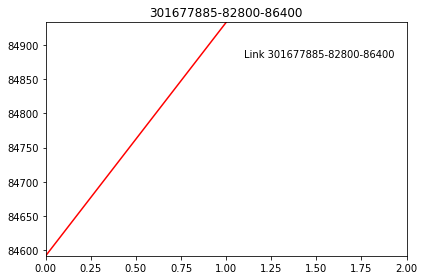

[[84592.]
 [84933.]]


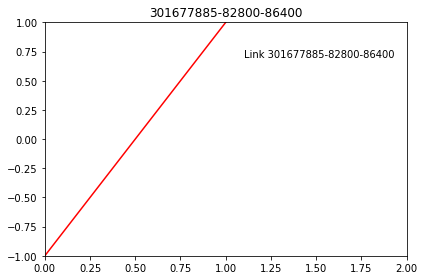

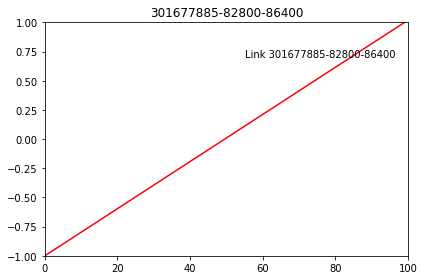

634307497-82800-86400


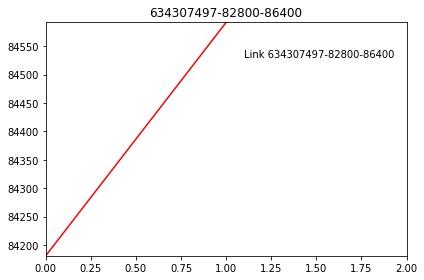

[[84181.]
 [84592.]]


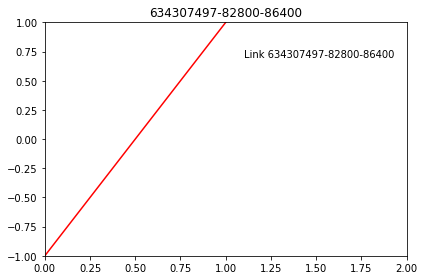

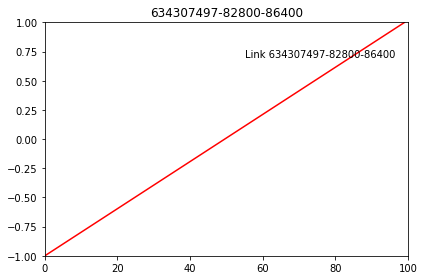

157490277-82800-86400


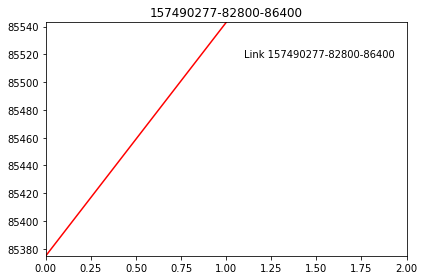

[[85375.]
 [85543.]]


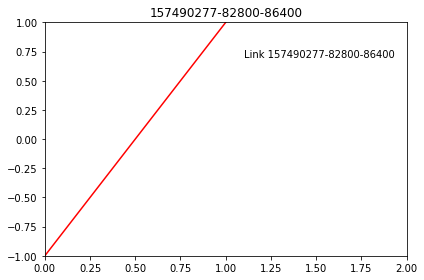

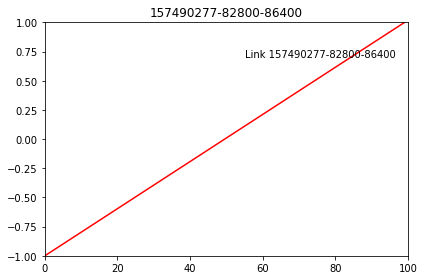

8838069-82800-86400


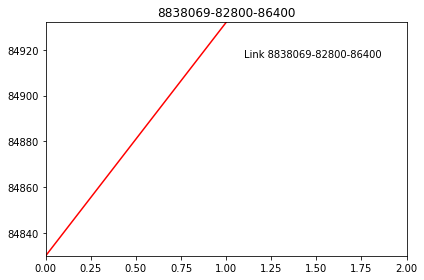

[[84830.]
 [84932.]]


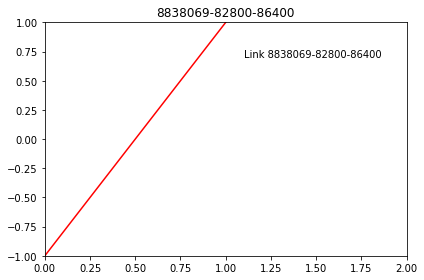

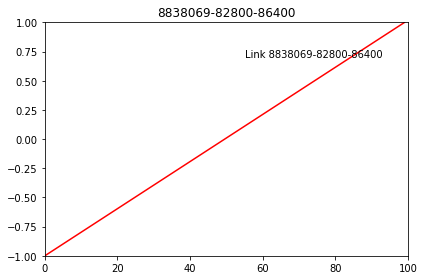

152980843-0-3600


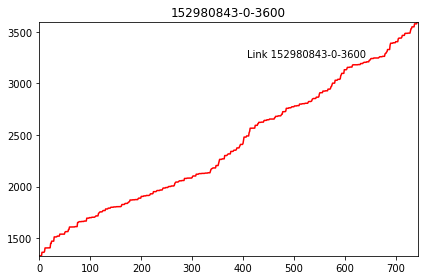

[[1329.]
 [1329.]
 [1329.]
 [1329.]
 [1329.]
 [1363.]
 [1363.]
 [1363.]
 [1363.]
 [1363.]
 [1372.]
 [1405.]
 [1405.]
 [1405.]
 [1405.]
 [1405.]
 [1406.]
 [1406.]
 [1406.]
 [1406.]
 [1406.]
 [1407.]
 [1449.]
 [1450.]
 [1471.]
 [1471.]
 [1471.]
 [1471.]
 [1471.]
 [1512.]
 [1512.]
 [1512.]
 [1512.]
 [1512.]
 [1514.]
 [1520.]
 [1520.]
 [1520.]
 [1520.]
 [1520.]
 [1539.]
 [1539.]
 [1539.]
 [1539.]
 [1539.]
 [1539.]
 [1539.]
 [1539.]
 [1539.]
 [1539.]
 [1556.]
 [1563.]
 [1563.]
 [1563.]
 [1563.]
 [1563.]
 [1564.]
 [1583.]
 [1584.]
 [1608.]
 [1608.]
 [1608.]
 [1608.]
 [1608.]
 [1608.]
 [1609.]
 [1609.]
 [1609.]
 [1609.]
 [1609.]
 [1612.]
 [1612.]
 [1612.]
 [1612.]
 [1612.]
 [1652.]
 [1653.]
 [1656.]
 [1660.]
 [1660.]
 [1660.]
 [1660.]
 [1660.]
 [1662.]
 [1662.]
 [1662.]
 [1662.]
 [1662.]
 [1666.]
 [1666.]
 [1666.]
 [1666.]
 [1666.]
 [1694.]
 [1694.]
 [1694.]
 [1694.]
 [1694.]
 [1699.]
 [1699.]
 [1699.]
 [1699.]
 [1699.]
 [1703.]
 [1703.]
 [1703.]
 [1703.]
 [1703.]
 [1703.]
 [1706.]
 [1710.]
 

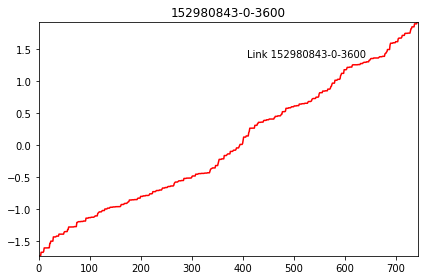

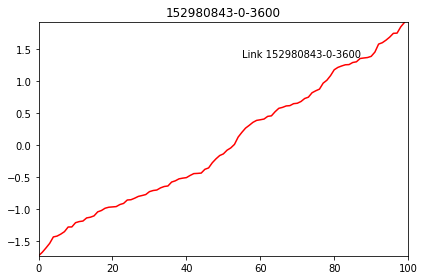

688769623-0-3600


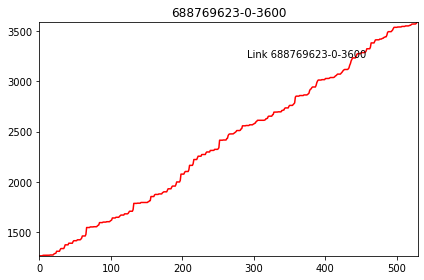

[[1265.]
 [1265.]
 [1265.]
 [1265.]
 [1265.]
 [1270.]
 [1270.]
 [1270.]
 [1270.]
 [1270.]
 [1271.]
 [1271.]
 [1271.]
 [1271.]
 [1271.]
 [1273.]
 [1273.]
 [1273.]
 [1273.]
 [1273.]
 [1281.]
 [1286.]
 [1288.]
 [1291.]
 [1310.]
 [1310.]
 [1310.]
 [1310.]
 [1310.]
 [1326.]
 [1337.]
 [1337.]
 [1337.]
 [1337.]
 [1337.]
 [1353.]
 [1374.]
 [1374.]
 [1374.]
 [1374.]
 [1374.]
 [1390.]
 [1390.]
 [1390.]
 [1390.]
 [1390.]
 [1390.]
 [1406.]
 [1415.]
 [1415.]
 [1415.]
 [1415.]
 [1415.]
 [1424.]
 [1424.]
 [1424.]
 [1424.]
 [1424.]
 [1431.]
 [1440.]
 [1462.]
 [1462.]
 [1462.]
 [1462.]
 [1462.]
 [1478.]
 [1546.]
 [1546.]
 [1546.]
 [1546.]
 [1546.]
 [1552.]
 [1552.]
 [1552.]
 [1552.]
 [1552.]
 [1554.]
 [1554.]
 [1554.]
 [1554.]
 [1554.]
 [1562.]
 [1568.]
 [1571.]
 [1595.]
 [1595.]
 [1595.]
 [1595.]
 [1595.]
 [1600.]
 [1600.]
 [1600.]
 [1600.]
 [1600.]
 [1604.]
 [1604.]
 [1604.]
 [1604.]
 [1604.]
 [1611.]
 [1616.]
 [1621.]
 [1641.]
 [1641.]
 [1641.]
 [1641.]
 [1641.]
 [1648.]
 [1648.]
 [1648.]
 [1648.]
 

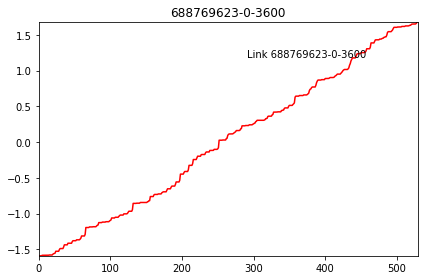

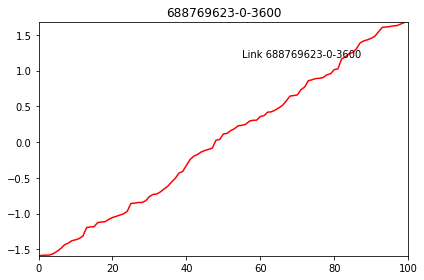

298786465-79200-82800


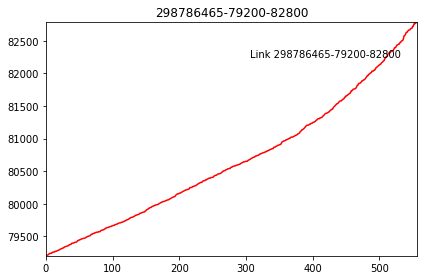

[[79201.]
 [79206.]
 [79211.]
 [79215.]
 [79219.]
 [79232.]
 [79237.]
 [79238.]
 [79240.]
 [79250.]
 [79250.]
 [79258.]
 [79258.]
 [79260.]
 [79269.]
 [79269.]
 [79274.]
 [79279.]
 [79282.]
 [79286.]
 [79291.]
 [79297.]
 [79305.]
 [79309.]
 [79312.]
 [79314.]
 [79325.]
 [79326.]
 [79336.]
 [79342.]
 [79343.]
 [79346.]
 [79348.]
 [79353.]
 [79358.]
 [79370.]
 [79370.]
 [79378.]
 [79380.]
 [79393.]
 [79393.]
 [79397.]
 [79398.]
 [79407.]
 [79409.]
 [79411.]
 [79412.]
 [79425.]
 [79434.]
 [79437.]
 [79445.]
 [79445.]
 [79453.]
 [79458.]
 [79459.]
 [79464.]
 [79466.]
 [79471.]
 [79473.]
 [79474.]
 [79482.]
 [79486.]
 [79497.]
 [79498.]
 [79502.]
 [79507.]
 [79510.]
 [79513.]
 [79532.]
 [79533.]
 [79534.]
 [79545.]
 [79545.]
 [79548.]
 [79557.]
 [79558.]
 [79562.]
 [79564.]
 [79564.]
 [79570.]
 [79571.]
 [79571.]
 [79582.]
 [79591.]
 [79594.]
 [79594.]
 [79600.]
 [79603.]
 [79612.]
 [79615.]
 [79627.]
 [79629.]
 [79634.]
 [79635.]
 [79638.]
 [79645.]
 [79647.]
 [79650.]
 [79652.]
 [79661.]


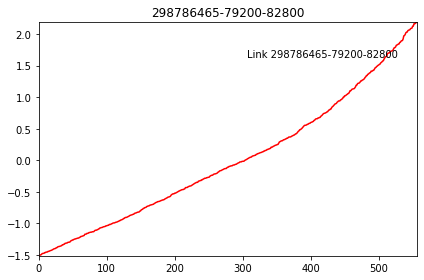

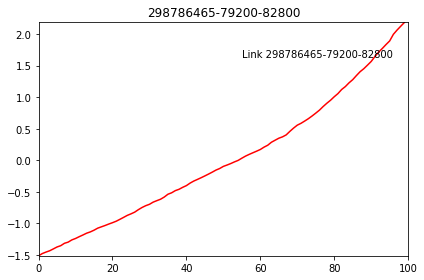

327005892-79200-82800


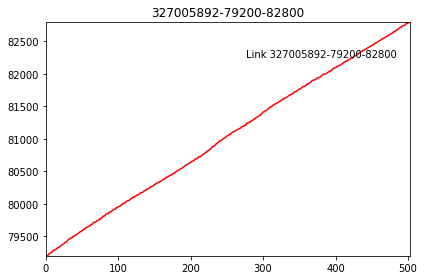

[[79200.]
 [79201.]
 [79203.]
 [79210.]
 [79224.]
 [79238.]
 [79241.]
 [79246.]
 [79247.]
 [79271.]
 [79277.]
 [79282.]
 [79295.]
 [79295.]
 [79297.]
 [79313.]
 [79321.]
 [79325.]
 [79330.]
 [79337.]
 [79349.]
 [79357.]
 [79369.]
 [79373.]
 [79376.]
 [79385.]
 [79402.]
 [79412.]
 [79413.]
 [79419.]
 [79438.]
 [79446.]
 [79457.]
 [79458.]
 [79467.]
 [79479.]
 [79480.]
 [79484.]
 [79503.]
 [79504.]
 [79512.]
 [79515.]
 [79524.]
 [79534.]
 [79538.]
 [79545.]
 [79555.]
 [79567.]
 [79572.]
 [79572.]
 [79591.]
 [79591.]
 [79607.]
 [79607.]
 [79617.]
 [79626.]
 [79637.]
 [79641.]
 [79647.]
 [79651.]
 [79656.]
 [79662.]
 [79679.]
 [79683.]
 [79684.]
 [79703.]
 [79709.]
 [79718.]
 [79718.]
 [79723.]
 [79733.]
 [79743.]
 [79745.]
 [79751.]
 [79753.]
 [79767.]
 [79776.]
 [79785.]
 [79789.]
 [79810.]
 [79811.]
 [79816.]
 [79823.]
 [79844.]
 [79845.]
 [79847.]
 [79848.]
 [79868.]
 [79869.]
 [79874.]
 [79877.]
 [79890.]
 [79896.]
 [79908.]
 [79911.]
 [79917.]
 [79919.]
 [79938.]
 [79939.]
 [79948.]


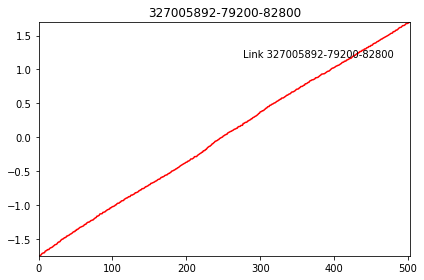

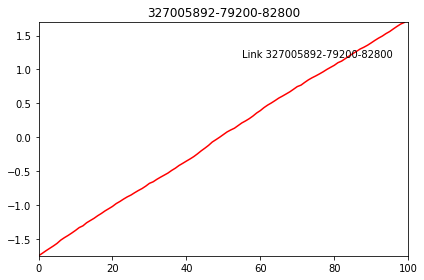

298786467-79200-82800


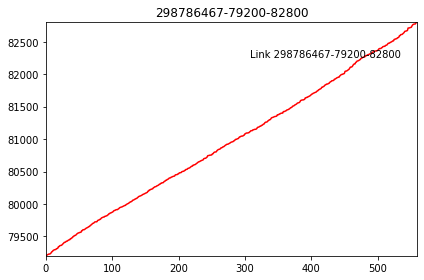

[[79201.]
 [79207.]
 [79214.]
 [79220.]
 [79226.]
 [79228.]
 [79229.]
 [79235.]
 [79247.]
 [79263.]
 [79268.]
 [79283.]
 [79289.]
 [79294.]
 [79296.]
 [79298.]
 [79310.]
 [79313.]
 [79318.]
 [79341.]
 [79343.]
 [79356.]
 [79360.]
 [79361.]
 [79366.]
 [79377.]
 [79390.]
 [79398.]
 [79409.]
 [79409.]
 [79416.]
 [79426.]
 [79426.]
 [79435.]
 [79442.]
 [79447.]
 [79448.]
 [79465.]
 [79465.]
 [79476.]
 [79481.]
 [79497.]
 [79500.]
 [79513.]
 [79514.]
 [79518.]
 [79529.]
 [79540.]
 [79548.]
 [79554.]
 [79555.]
 [79561.]
 [79563.]
 [79564.]
 [79588.]
 [79589.]
 [79603.]
 [79604.]
 [79604.]
 [79611.]
 [79620.]
 [79628.]
 [79632.]
 [79638.]
 [79644.]
 [79652.]
 [79654.]
 [79669.]
 [79675.]
 [79682.]
 [79695.]
 [79702.]
 [79704.]
 [79713.]
 [79724.]
 [79724.]
 [79725.]
 [79726.]
 [79744.]
 [79750.]
 [79752.]
 [79761.]
 [79762.]
 [79774.]
 [79785.]
 [79790.]
 [79795.]
 [79799.]
 [79799.]
 [79810.]
 [79811.]
 [79816.]
 [79818.]
 [79828.]
 [79834.]
 [79848.]
 [79850.]
 [79861.]
 [79862.]
 [79867.]


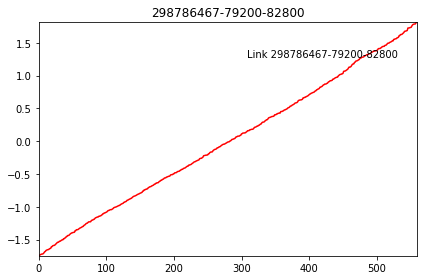

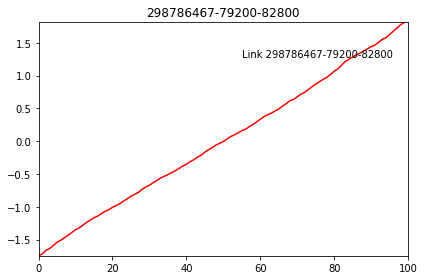

221553428-79200-82800


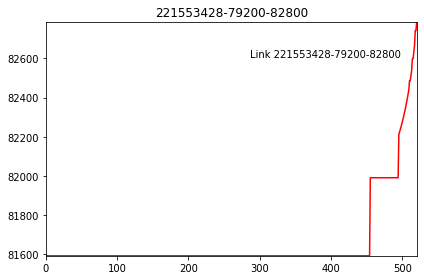

[[81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]
 [81593.]


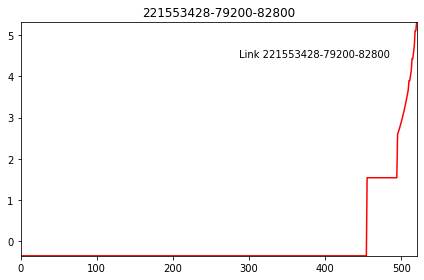

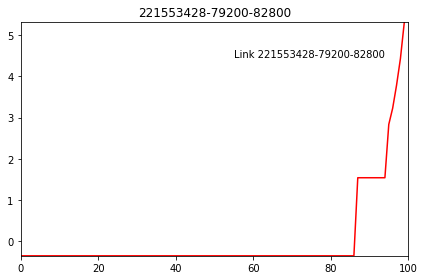

298786469-79200-82800


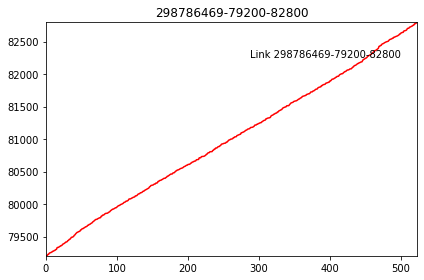

[[79205.]
 [79206.]
 [79208.]
 [79228.]
 [79229.]
 [79246.]
 [79252.]
 [79253.]
 [79262.]
 [79266.]
 [79276.]
 [79278.]
 [79287.]
 [79290.]
 [79300.]
 [79305.]
 [79332.]
 [79333.]
 [79335.]
 [79346.]
 [79350.]
 [79360.]
 [79361.]
 [79371.]
 [79385.]
 [79389.]
 [79396.]
 [79404.]
 [79416.]
 [79417.]
 [79423.]
 [79438.]
 [79443.]
 [79458.]
 [79460.]
 [79473.]
 [79490.]
 [79490.]
 [79496.]
 [79501.]
 [79520.]
 [79527.]
 [79543.]
 [79555.]
 [79565.]
 [79568.]
 [79576.]
 [79579.]
 [79584.]
 [79603.]
 [79606.]
 [79620.]
 [79624.]
 [79625.]
 [79637.]
 [79642.]
 [79651.]
 [79653.]
 [79660.]
 [79674.]
 [79676.]
 [79687.]
 [79689.]
 [79698.]
 [79706.]
 [79711.]
 [79725.]
 [79733.]
 [79742.]
 [79753.]
 [79762.]
 [79765.]
 [79766.]
 [79775.]
 [79781.]
 [79786.]
 [79790.]
 [79791.]
 [79814.]
 [79817.]
 [79831.]
 [79831.]
 [79837.]
 [79848.]
 [79856.]
 [79858.]
 [79859.]
 [79861.]
 [79871.]
 [79877.]
 [79883.]
 [79897.]
 [79905.]
 [79915.]
 [79922.]
 [79923.]
 [79929.]
 [79937.]
 [79943.]
 [79944.]


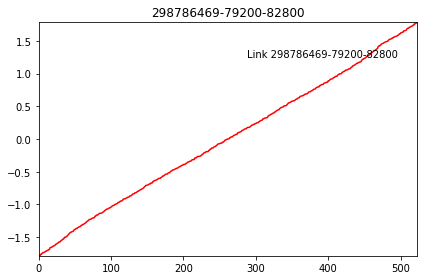

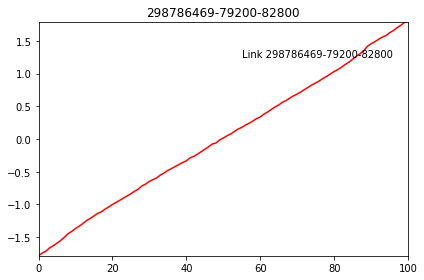

298786468-79200-82800


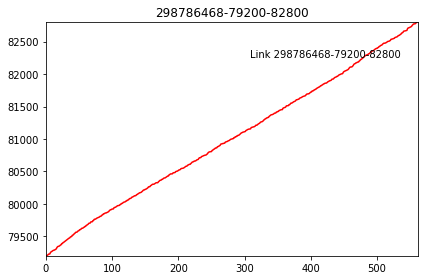

[[79201.]
 [79205.]
 [79206.]
 [79214.]
 [79226.]
 [79228.]
 [79229.]
 [79252.]
 [79262.]
 [79268.]
 [79276.]
 [79283.]
 [79287.]
 [79289.]
 [79296.]
 [79300.]
 [79313.]
 [79332.]
 [79343.]
 [79346.]
 [79350.]
 [79356.]
 [79366.]
 [79371.]
 [79389.]
 [79390.]
 [79404.]
 [79409.]
 [79417.]
 [79426.]
 [79435.]
 [79443.]
 [79447.]
 [79458.]
 [79465.]
 [79473.]
 [79476.]
 [79490.]
 [79496.]
 [79497.]
 [79518.]
 [79520.]
 [79529.]
 [79543.]
 [79548.]
 [79563.]
 [79564.]
 [79565.]
 [79579.]
 [79584.]
 [79589.]
 [79603.]
 [79604.]
 [79611.]
 [79624.]
 [79625.]
 [79628.]
 [79638.]
 [79642.]
 [79653.]
 [79654.]
 [79669.]
 [79674.]
 [79682.]
 [79689.]
 [79702.]
 [79704.]
 [79706.]
 [79724.]
 [79725.]
 [79725.]
 [79742.]
 [79744.]
 [79762.]
 [79765.]
 [79766.]
 [79774.]
 [79781.]
 [79786.]
 [79790.]
 [79795.]
 [79799.]
 [79810.]
 [79811.]
 [79817.]
 [79831.]
 [79834.]
 [79848.]
 [79848.]
 [79856.]
 [79861.]
 [79861.]
 [79867.]
 [79871.]
 [79878.]
 [79883.]
 [79899.]
 [79905.]
 [79912.]
 [79913.]


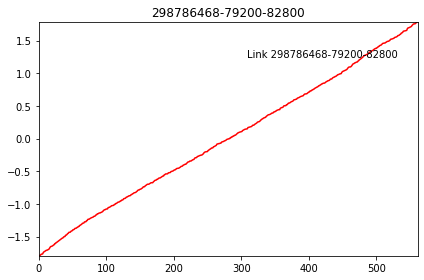

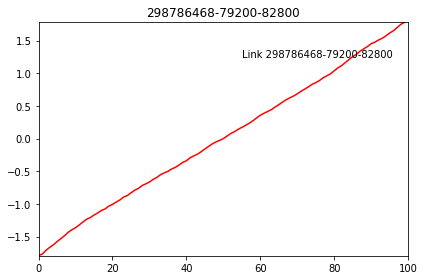

298786466-79200-82800


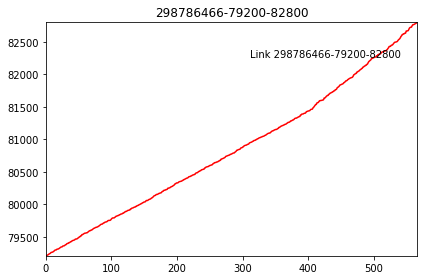

[[79207.]
 [79211.]
 [79215.]
 [79220.]
 [79228.]
 [79235.]
 [79240.]
 [79247.]
 [79258.]
 [79260.]
 [79263.]
 [79269.]
 [79274.]
 [79286.]
 [79294.]
 [79297.]
 [79298.]
 [79309.]
 [79310.]
 [79312.]
 [79318.]
 [79326.]
 [79336.]
 [79341.]
 [79343.]
 [79346.]
 [79358.]
 [79360.]
 [79361.]
 [79370.]
 [79377.]
 [79380.]
 [79393.]
 [79397.]
 [79398.]
 [79409.]
 [79409.]
 [79416.]
 [79425.]
 [79426.]
 [79437.]
 [79442.]
 [79445.]
 [79448.]
 [79453.]
 [79464.]
 [79465.]
 [79466.]
 [79471.]
 [79481.]
 [79486.]
 [79498.]
 [79500.]
 [79513.]
 [79514.]
 [79533.]
 [79534.]
 [79540.]
 [79548.]
 [79554.]
 [79555.]
 [79557.]
 [79561.]
 [79562.]
 [79571.]
 [79582.]
 [79588.]
 [79594.]
 [79594.]
 [79603.]
 [79604.]
 [79612.]
 [79620.]
 [79629.]
 [79632.]
 [79638.]
 [79644.]
 [79645.]
 [79650.]
 [79652.]
 [79661.]
 [79666.]
 [79675.]
 [79682.]
 [79691.]
 [79694.]
 [79695.]
 [79705.]
 [79713.]
 [79714.]
 [79724.]
 [79726.]
 [79729.]
 [79732.]
 [79742.]
 [79750.]
 [79751.]
 [79752.]
 [79753.]
 [79761.]


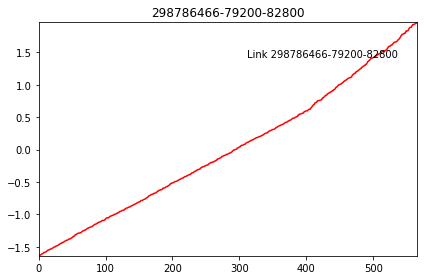

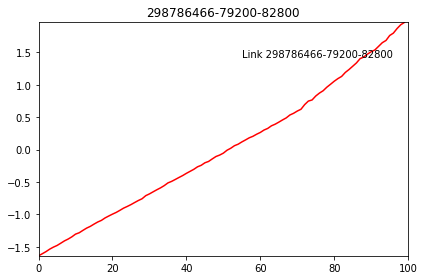

298786464-79200-82800


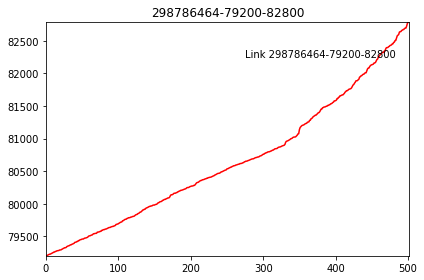

[[79201.]
 [79206.]
 [79208.]
 [79214.]
 [79219.]
 [79225.]
 [79226.]
 [79232.]
 [79238.]
 [79245.]
 [79250.]
 [79258.]
 [79258.]
 [79267.]
 [79269.]
 [79276.]
 [79279.]
 [79281.]
 [79282.]
 [79290.]
 [79291.]
 [79292.]
 [79301.]
 [79305.]
 [79314.]
 [79318.]
 [79325.]
 [79325.]
 [79329.]
 [79342.]
 [79348.]
 [79353.]
 [79355.]
 [79363.]
 [79369.]
 [79370.]
 [79378.]
 [79382.]
 [79388.]
 [79393.]
 [79407.]
 [79410.]
 [79412.]
 [79421.]
 [79421.]
 [79434.]
 [79435.]
 [79445.]
 [79449.]
 [79451.]
 [79458.]
 [79458.]
 [79459.]
 [79469.]
 [79473.]
 [79474.]
 [79478.]
 [79482.]
 [79489.]
 [79502.]
 [79507.]
 [79508.]
 [79513.]
 [79519.]
 [79521.]
 [79532.]
 [79540.]
 [79540.]
 [79545.]
 [79545.]
 [79546.]
 [79564.]
 [79564.]
 [79567.]
 [79570.]
 [79576.]
 [79576.]
 [79591.]
 [79591.]
 [79600.]
 [79603.]
 [79603.]
 [79611.]
 [79612.]
 [79615.]
 [79623.]
 [79627.]
 [79634.]
 [79635.]
 [79637.]
 [79645.]
 [79647.]
 [79652.]
 [79652.]
 [79659.]
 [79661.]
 [79669.]
 [79683.]
 [79684.]
 [79689.]


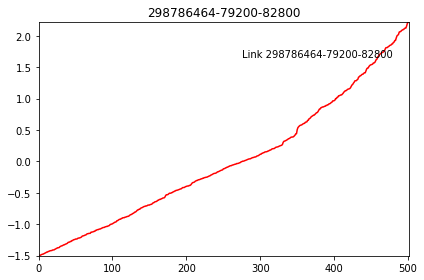

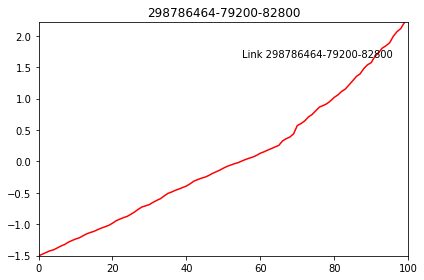

In [34]:
centroids = {}
general_data = list()
for key in most_accessed_sequence:
    sequence = most_accessed_sequence[key]
    print(key)
    X = to_time_series_dataset(sequence)
    chartLink(X[0], key)
    print(X[0])
    X = TimeSeriesScalerMeanVariance().fit_transform(X)
    chartLink(X[0], key)
    X = TimeSeriesResampler(100).fit_transform(X)
    chartLink(X[0], key)
    links_data = list()
    centroids[key] = X[0]
for other in data:
    Y = to_time_series_dataset(other[3:])
    Y = TimeSeriesScalerMeanVariance().fit_transform(Y)
    Y = TimeSeriesResampler(sz).fit_transform(Y)
    general_data.append(Y[0])

In [29]:
centroids = {}
general_data = list()
for key in most_accessed_sequence:
    sequence = most_accessed_sequence[key]
    X = to_time_series_dataset(sequence)
    X = TimeSeriesScalerMeanVariance().fit_transform(X)
    X = TimeSeriesResampler(sz).fit_transform(X)
    centroids[key] = X[0]
for other in data:
    Y = to_time_series_dataset(other[3:])
    Y = TimeSeriesScalerMeanVariance().fit_transform(Y)
    Y = TimeSeriesResampler(sz).fit_transform(Y)
    general_data.append(Y[0])

In [30]:
result = Kmeans(general_data, centroids, len(centroids), 1, w = 34)

1


KeyboardInterrupt: 

In [39]:
print(result)

{'152746500-82800-86400': [1, 2, 3]}


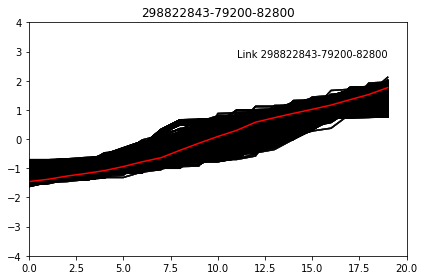

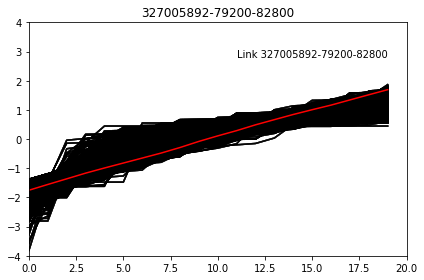

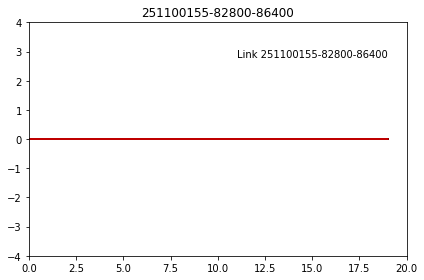

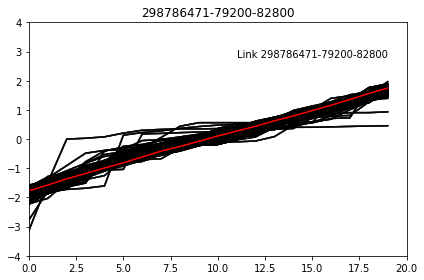

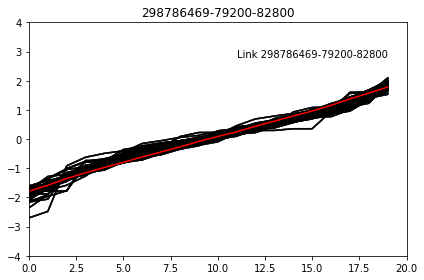

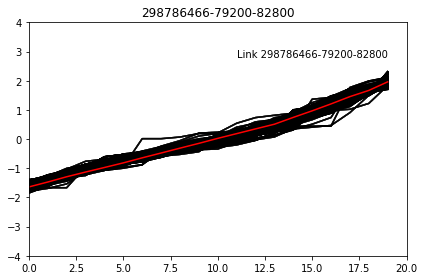

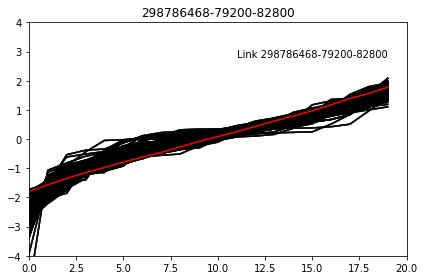

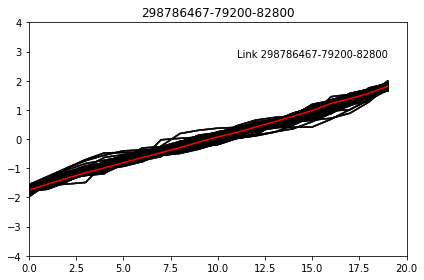

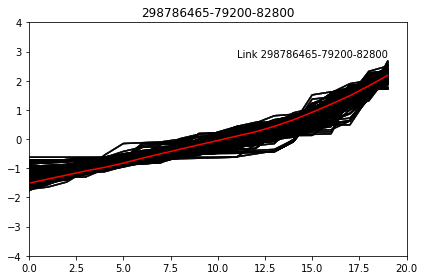

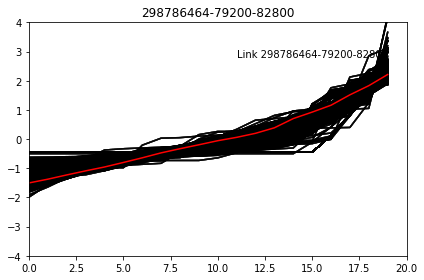

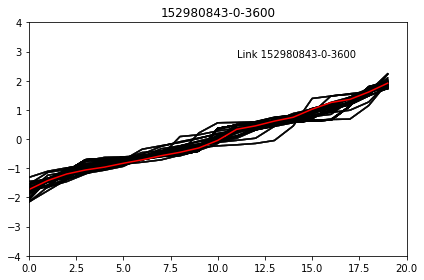

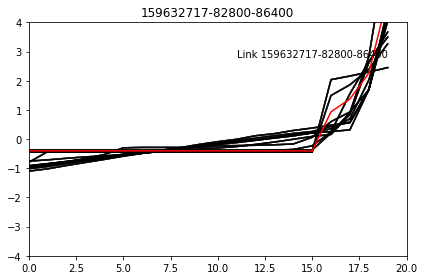

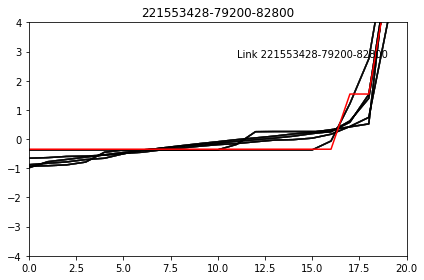

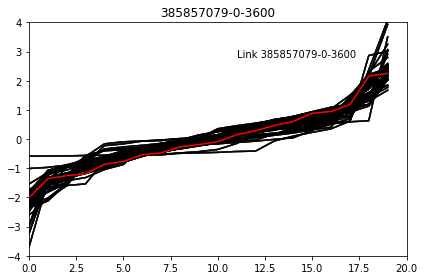

In [27]:
for key in result:
    centroid = centroids[key]
    data_cluster = list()
    print(key)
    for i in result[key]:
        data_cluster.append(general_data[i])
    print("Number of sequences: "+str(len(data_cluster)))
    chartLinks(sz, centroid, data_cluster, key)
    